In [573]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

home = pd.read_csv('house.txt',names=["size","bedroom","price"]) 

home['size'] = home['size']/1000
home['price'] = home['price']/100000

ip = ['size','bedroom']

x = home[ip].values
y = home['price'].values



In [574]:
def cost_function(x,y,w,b):
    c = np.sum(np.square(x@w.T + b -y))/(2*len(x))
    return c
#print(cost_function(x,y,w,b))

In [575]:
# this is term of Derivative/m
def gradient_function(x,y,w,b):
    err = x@w.T+b -y.T

    dj_w = x.T@err
    dj_b = np.sum(err)
    
    dj_w = dj_w/m
    dj_b = dj_b/m
        
    return dj_w,dj_b
#gradient_function(x,y,w,b)

In [576]:
def gradient_descent(x,y,w,b,alpha,iter):
    J_history = list()
    
    for i in range(0,iter):
        
        dj_w,dj_b = gradient_function(x,y,w,b)

        w = w - alpha * dj_w
        b = b - alpha * dj_b
        
        J_history.append( cost_function(x, y, w, b))
       
    J_history = np.array(J_history)
    return w,b, J_history 


In [577]:
# initialize parameters
initial_w = np.zeros(2)
initial_b = 0.

iterations = 2000
alpha = 0.001
# run gradient descent 

w_final, b_final, J_hist = gradient_descent(x, y, initial_w, initial_b, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} cost = {J_hist[-1]}")
m,_ = x.shape
for i in range(m):
    print(f"{i}) prediction: {(np.dot(x[i], w_final)+b_final)*100000}, target value: {y[i]*100000}")
w_final = np.reshape(w_final,(1,2))

b,w found by gradient descent: 0.22,[0.88388636 0.44491446] cost = 0.2748295210044326
0) prediction: 341042.3327065042, target value: 399900.0
1) prediction: 296494.4602462465, target value: 329900.0
2) prediction: 367205.3689133223, target value: 369000.0
3) prediction: 235739.5052689917, target value: 231999.99999999997
4) prediction: 464729.99639745645, target value: 539900.0
5) prediction: 375015.53102610406, target value: 299900.0
6) prediction: 290660.81028121273, target value: 314900.0
7) prediction: 281203.22624699125, target value: 198999.0
8) prediction: 277048.9603628006, target value: 212000.0
9) prediction: 287125.2648478589, target value: 242499.99999999997
10) prediction: 371038.042413581, target value: 239998.99999999997
11) prediction: 331849.9145797844, target value: 347000.0
12) prediction: 322127.1646380615, target value: 329999.0
13) prediction: 639859.8461437064, target value: 699900.0
14) prediction: 267149.43314941, target value: 259900.00000000003
15) predictio

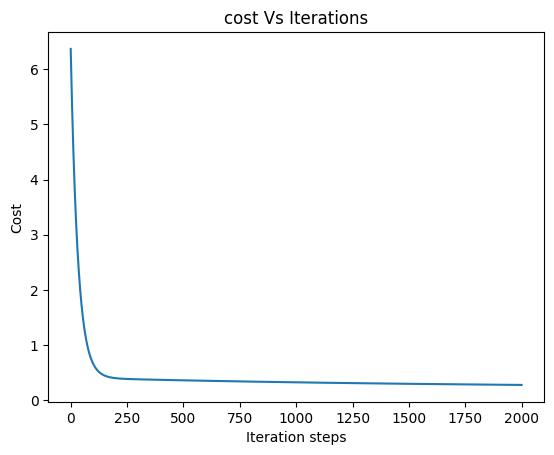

In [578]:
plt.plot(J_hist)
plt.title('cost Vs Iterations')
plt.xlabel('Iteration steps')
plt.ylabel('Cost')
plt.show()

In [580]:
def predict_price(x,w,b):
    x[:, 0] /= 1000.0    
    y = (x@w.T + b)*100000
    return y
    
new_x = np.array([[2124,3],[1601,3]], dtype=np.float64)   # features to predict
print('w ; ',w_final,'b : ',b_final)

yhat = predict_price(new_x,w_final,b_final)
print("Predicted Values : \n",yhat)

w ;  [[0.88388636 0.44491446]] b :  0.21598304960612763
Predicted Values : 
 [[342810.10542318]
 [296582.84888208]]
